In [8]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

In [9]:
nas = pd.read_csv('NAS.csv')
nas

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [10]:
nas.dropna(inplace = True)

In [11]:
nas['Date'] = pd.to_datetime(nas['Date'])    
nas['Date_delta'] = (nas['Date'] - nas['Date'].min())  / np.timedelta64(1,'D')

In [12]:
nas.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date_delta
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0,0.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0,1.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0,4.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0,5.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0,11.0


In [13]:
input = nas.drop(['Date', 'Open','High', 'Low', 'Close','Adj Close', 'Volume'] ,axis='columns')
input.head(10)

,Date_delta
0,0.0
1,1.0
2,4.0
3,5.0
7,11.0
8,12.0
11,15.0
12,18.0
13,19.0
14,20.0


In [14]:
close = nas.Close
close

0       19.139799
1       18.454201
2       18.054300
3       17.425800
7       17.254400
          ...    
4248     0.676800
4249     0.600600
4250     0.626000
4251     0.605000
4252     0.610600
Name: Close, Length: 4218, dtype: float64

In [15]:
# Create linear regression object
regObj = linear_model.LinearRegression()
regObj.fit(input,close)

LinearRegression()

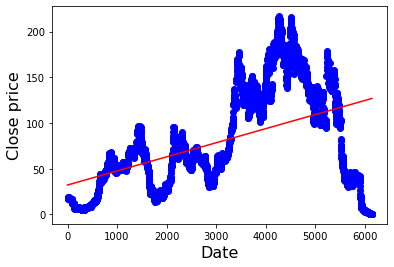

In [17]:
#%matplotlib inline
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close price',fontsize=16)
#Visual Represention of linear equation with Linear Regression
plt.scatter(nas.Date_delta,nas.Close,color='blue')
plt.plot(nas.Date_delta,regObj.predict(nas[['Date_delta']]),color='red')

In [20]:
nas

,Date,Open,High,Low,Close,Adj Close,Volume,Date_delta
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0,0.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0,1.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0,4.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0,5.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0,11.0
...,...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0,6143.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0,6144.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0,6145.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0,6146.0


## Predict random historical date
Historical data goes from 0 to 6147. Testing on values in between.

In [21]:
regObj.predict([[6000]])

array([124.60580923])

In [22]:
coefficient=regObj.coef_
coefficient

array([0.0153956])

In [23]:
intercept=regObj.intercept_
intercept

32.23222067659181

In [25]:
coefficient*(6000)+intercept

array([124.60580923])